In [3]:
# Load the necessary library
library(readr)

# Define the file path for the wine dataset
wine_data_path <- 'wine.data'

# Load the wine dataset without column names
wine_data <- read_csv(wine_data_path, col_names = FALSE)

# Set column names for the wine dataset
colnames(wine_data) <- c("class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
                         "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
                         "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline")

# Display the first few rows of the dataset
head(wine_data)


Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(caret)
library(class)

# Load the wine dataset
wine_data <- read.csv("wine_data_with_column_names.csv")

# Check the structure of the data
str(wine_data)

# Convert class column to factor for classification
wine_data$class <- as.factor(wine_data$class)

# Separate features and target variable
wine_features <- wine_data[, -1]  # Remove class column
wine_class <- wine_data$class

# 1. Compute PCA on scaled data
wine_pca <- prcomp(wine_features, center = TRUE, scale. = TRUE)

# Summary of PCA results
summary(wine_pca)

# Extract the PC scores
wine_scores <- wine_pca$x




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice



'data.frame':	178 obs. of  14 variables:
 $ class                       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol                     : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic.acid                  : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                         : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alcalinity.of.ash           : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium                   : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Total.phenols               : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids                  : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid.phenols        : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins             : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color.intensity             : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                         :

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

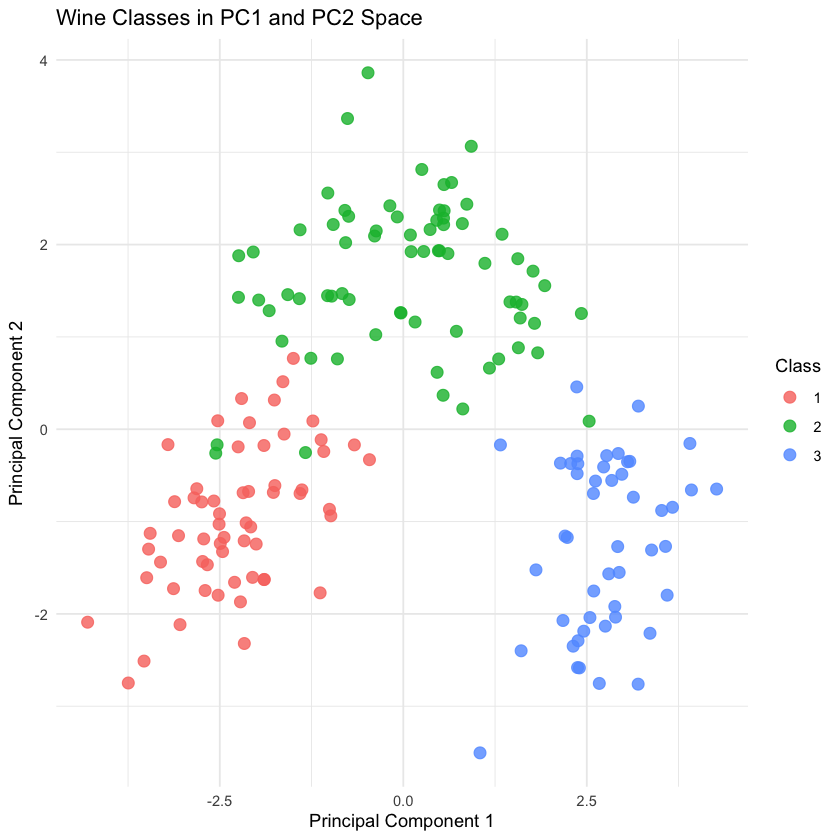

In [6]:
# 2. Plot the dataset using 1st and 2nd PC
pca_plot <- data.frame(PC1 = wine_scores[, 1], 
                      PC2 = wine_scores[, 2], 
                      Class = wine_class)

ggplot(pca_plot, aes(x = PC1, y = PC2, color = Class)) +
  geom_point(size = 3, alpha = 0.8) +
  ggtitle("Wine Classes in PC1 and PC2 Space") +
  theme_minimal() +
  labs(x = "Principal Component 1", y = "Principal Component 2")


[1] "Variables contributing most to PC1 (by absolute loading):"
                  Flavanoids                Total.phenols 
                 0.422934297                  0.394660845 
OD280.OD315.of.diluted.wines              Proanthocyanins 
                 0.376167411                  0.313429488 
        Nonflavanoid.phenols                          Hue 
                 0.298533103                  0.296714564 
                     Proline                   Malic.acid 
                 0.286752227                  0.245187580 
           Alcalinity.of.ash                      Alcohol 
                 0.239320405                  0.144329395 
                   Magnesium              Color.intensity 
                 0.141992042                  0.088616705 
                         Ash 
                 0.002051061 


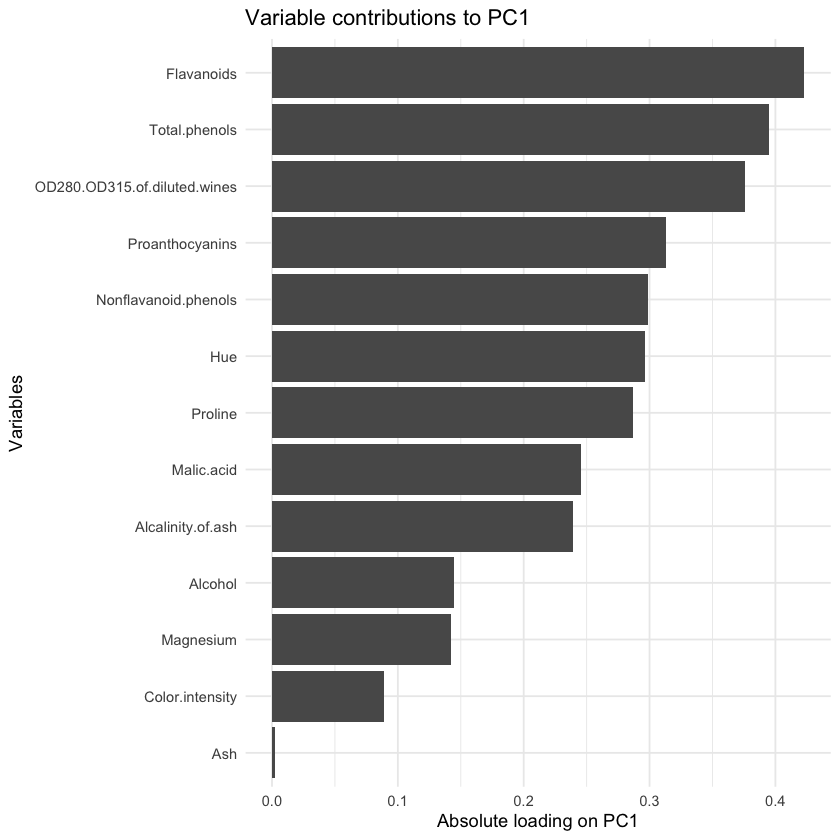

In [7]:
# 3. Identify variables contributing most to the 1st PC
loadings <- wine_pca$rotation[, 1]
sorted_loadings <- sort(abs(loadings), decreasing = TRUE)
print("Variables contributing most to PC1 (by absolute loading):")
print(sorted_loadings)

# Create a barplot of the loadings
loadings_df <- data.frame(
  Variable = names(loadings),
  Loading = abs(loadings)
)
loadings_df <- loadings_df[order(loadings_df$Loading, decreasing = TRUE), ]

ggplot(loadings_df, aes(x = reorder(Variable, Loading), y = Loading)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  theme_minimal() +
  labs(x = "Variables", y = "Absolute loading on PC1", 
       title = "Variable contributions to PC1")



[1] "Top 7 contributing variables:"
[1] "Flavanoids"                   "Total.phenols"               
[3] "OD280.OD315.of.diluted.wines" "Proanthocyanins"             
[5] "Nonflavanoid.phenols"         "Hue"                         
[7] "Proline"                     


Importance of components:
                          PC1    PC2    PC3     PC4     PC5    PC6     PC7
Standard deviation     2.0117 0.9146 0.8386 0.81007 0.63402 0.4950 0.33188
Proportion of Variance 0.5781 0.1195 0.1005 0.09374 0.05743 0.0350 0.01573
Cumulative Proportion  0.5781 0.6976 0.7981 0.89184 0.94926 0.9843 1.00000

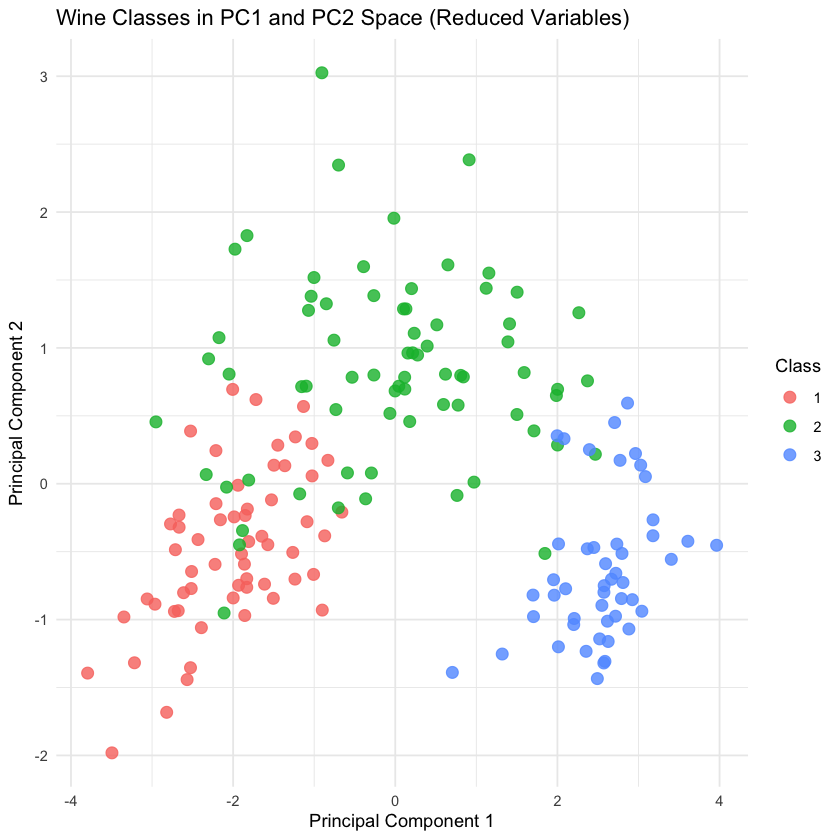

In [8]:
# 4. Drop the variables least contributing to PC1 and rerun PCA
# Let's keep only the top 7 contributing variables
top_contributors <- names(sorted_loadings)[1:7]
print("Top 7 contributing variables:")
print(top_contributors)

reduced_data <- wine_data[, c("class", top_contributors)]
reduced_features <- reduced_data[, -1]

# Rerun PCA on reduced dataset
reduced_pca <- prcomp(reduced_features, center = TRUE, scale. = TRUE)
summary(reduced_pca)

# Plot the reduced PCA
reduced_scores <- reduced_pca$x
reduced_pca_plot <- data.frame(PC1 = reduced_scores[, 1], 
                              PC2 = reduced_scores[, 2], 
                              Class = wine_class)

ggplot(reduced_pca_plot, aes(x = PC1, y = PC2, color = Class)) +
  geom_point(size = 3, alpha = 0.8) +
  ggtitle("Wine Classes in PC1 and PC2 Space (Reduced Variables)") +
  theme_minimal() +
  labs(x = "Principal Component 1", y = "Principal Component 2")


In [9]:
# 5. Train a classifier model (kNN) on original dataset
# Split data into training and testing sets
set.seed(123)  # For reproducibility
trainIndex <- createDataPartition(wine_class, p = 0.7, list = FALSE)
train_features <- wine_features[trainIndex, ]
test_features <- wine_features[-trainIndex, ]
train_class <- wine_class[trainIndex]
test_class <- wine_class[-trainIndex]

# Scale the features
train_scaled <- scale(train_features)
test_scaled <- scale(test_features, 
                    center = attr(train_scaled, "scaled:center"),
                    scale = attr(train_scaled, "scaled:scale"))

# Find optimal k for kNN
k_values <- 1:20
cv_results <- lapply(k_values, function(k) {
  knn_cv <- knn.cv(train_scaled, train_class, k = k)
  mean(knn_cv == train_class)
})

best_k <- k_values[which.max(unlist(cv_results))]
cat("Best k value:", best_k, "\n")

# Train kNN with best k
knn_pred <- knn(train_scaled, test_scaled, train_class, k = best_k)

# Evaluate original model
confMatrix_original <- confusionMatrix(knn_pred, test_class)
print("Confusion Matrix for Original Dataset:")
print(confMatrix_original$table)
print("Classification Metrics for Original Dataset:")
print(confMatrix_original$byClass)
print("Overall Accuracy for Original Dataset:")
print(confMatrix_original$overall["Accuracy"])


Best k value: 17 
[1] "Confusion Matrix for Original Dataset:"
          Reference
Prediction  1  2  3
         1 17  0  0
         2  0 20  0
         3  0  1 14
[1] "Classification Metrics for Original Dataset:"
         Sensitivity Specificity Pos Pred Value Neg Pred Value Precision
Class: 1    1.000000   1.0000000      1.0000000        1.00000 1.0000000
Class: 2    0.952381   1.0000000      1.0000000        0.96875 1.0000000
Class: 3    1.000000   0.9736842      0.9333333        1.00000 0.9333333
           Recall        F1 Prevalence Detection Rate Detection Prevalence
Class: 1 1.000000 1.0000000  0.3269231      0.3269231            0.3269231
Class: 2 0.952381 0.9756098  0.4038462      0.3846154            0.3846154
Class: 3 1.000000 0.9655172  0.2692308      0.2692308            0.2884615
         Balanced Accuracy
Class: 1         1.0000000
Class: 2         0.9761905
Class: 3         0.9868421
[1] "Overall Accuracy for Original Dataset:"
 Accuracy 
0.9807692 


In [10]:
# 6. Train kNN on first 3 PCs
# Get PC scores for training and testing sets
train_pca <- prcomp(train_features, center = TRUE, scale. = TRUE)
train_scores <- train_pca$x[, 1:3]  # First 3 PCs

# Project test data onto the same PCs
test_scores <- predict(train_pca, newdata = test_features)[, 1:3]

# Train kNN on PC scores
knn_pc_pred <- knn(train_scores, test_scores, train_class, k = best_k)

# Evaluate PC model
confMatrix_pc <- confusionMatrix(knn_pc_pred, test_class)
print("Confusion Matrix for PC Dataset:")
print(confMatrix_pc$table)
print("Classification Metrics for PC Dataset:")
print(confMatrix_pc$byClass)
print("Overall Accuracy for PC Dataset:")
print(confMatrix_pc$overall["Accuracy"])


[1] "Confusion Matrix for PC Dataset:"
          Reference
Prediction  1  2  3
         1 17  2  0
         2  0 19  0
         3  0  0 14
[1] "Classification Metrics for PC Dataset:"
         Sensitivity Specificity Pos Pred Value Neg Pred Value Precision
Class: 1   1.0000000   0.9428571      0.8947368      1.0000000 0.8947368
Class: 2   0.9047619   1.0000000      1.0000000      0.9393939 1.0000000
Class: 3   1.0000000   1.0000000      1.0000000      1.0000000 1.0000000
            Recall        F1 Prevalence Detection Rate Detection Prevalence
Class: 1 1.0000000 0.9444444  0.3269231      0.3269231            0.3653846
Class: 2 0.9047619 0.9500000  0.4038462      0.3653846            0.3653846
Class: 3 1.0000000 1.0000000  0.2692308      0.2692308            0.2692308
         Balanced Accuracy
Class: 1         0.9714286
Class: 2         0.9523810
Class: 3         1.0000000
[1] "Overall Accuracy for PC Dataset:"
 Accuracy 
0.9615385 


[1] "Model Comparison:"
              Model  Accuracy Precision   Recall  F1_Score
1 Original Features 0.9807692 0.9777778 0.984127 0.9803757
2       PC Features 0.9615385 0.9649123 0.968254 0.9648148


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


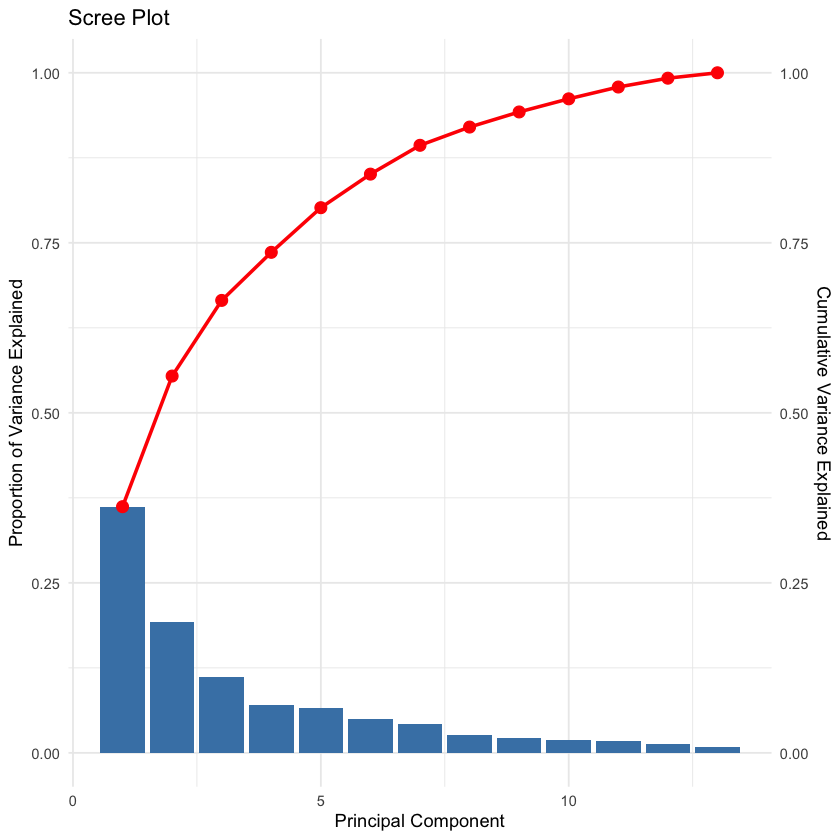

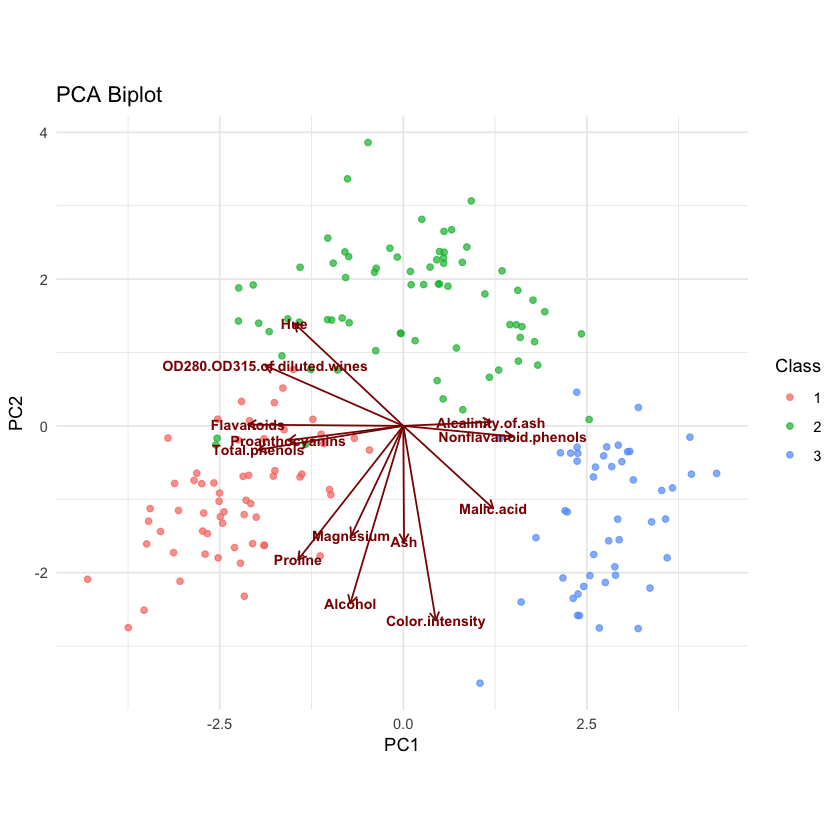

In [11]:
# 7. Compare the two models
model_comparison <- data.frame(
  Model = c("Original Features", "PC Features"),
  Accuracy = c(confMatrix_original$overall["Accuracy"], 
               confMatrix_pc$overall["Accuracy"]),
  Precision = c(mean(confMatrix_original$byClass[, "Precision"]), 
                mean(confMatrix_pc$byClass[, "Precision"])),
  Recall = c(mean(confMatrix_original$byClass[, "Recall"]), 
             mean(confMatrix_pc$byClass[, "Recall"])),
  F1_Score = c(mean(confMatrix_original$byClass[, "F1"]), 
               mean(confMatrix_pc$byClass[, "F1"]))
)

print("Model Comparison:")
print(model_comparison)

# Calculate variance explained by each principal component
var_explained <- wine_pca$sdev^2 / sum(wine_pca$sdev^2)
cumulative_var <- cumsum(var_explained)

# Create scree plot
var_df <- data.frame(
  PC = 1:length(var_explained),
  Variance = var_explained,
  Cumulative = cumulative_var
)

ggplot(var_df, aes(x = PC, y = Variance)) +
  geom_col(fill = "steelblue") +
  geom_line(aes(y = Cumulative), color = "red", size = 1) +
  geom_point(aes(y = Cumulative), color = "red", size = 3) +
  scale_y_continuous(sec.axis = sec_axis(~., name = "Cumulative Variance Explained")) +
  labs(x = "Principal Component", 
       y = "Proportion of Variance Explained",
       title = "Scree Plot") +
  theme_minimal()

# Create biplot for top variables
loadings_pc1pc2 <- wine_pca$rotation[, 1:2]
mult_factor <- 5  # Adjust this for better visualization
loadings_scaled <- loadings_pc1pc2 * mult_factor

biplot_data <- data.frame(
  PC1 = wine_scores[, 1],
  PC2 = wine_scores[, 2],
  Class = wine_class
)

# Create the biplot
ggplot() +
  geom_point(data = biplot_data, aes(x = PC1, y = PC2, color = Class), alpha = 0.7) +
  geom_segment(data = data.frame(
    x1 = 0, 
    y1 = 0,
    x2 = loadings_scaled[, 1],
    y2 = loadings_scaled[, 2],
    Variable = rownames(loadings_scaled)
  ), 
  aes(x = x1, y = y1, xend = x2, yend = y2), 
  arrow = arrow(length = unit(0.2, "cm")), color = "darkred") +
  geom_text(data = data.frame(
    x = loadings_scaled[, 1],
    y = loadings_scaled[, 2],
    Variable = rownames(loadings_scaled)
  ),
  aes(x = x, y = y, label = Variable), 
  color = "darkred", fontface = "bold", size = 3) +
  theme_minimal() +
  labs(title = "PCA Biplot", x = "PC1", y = "PC2") +
  coord_equal()